In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt 
from xgboost import XGBRFRegressor
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Medicalpremium.csv')

In [3]:
#check null value
data.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

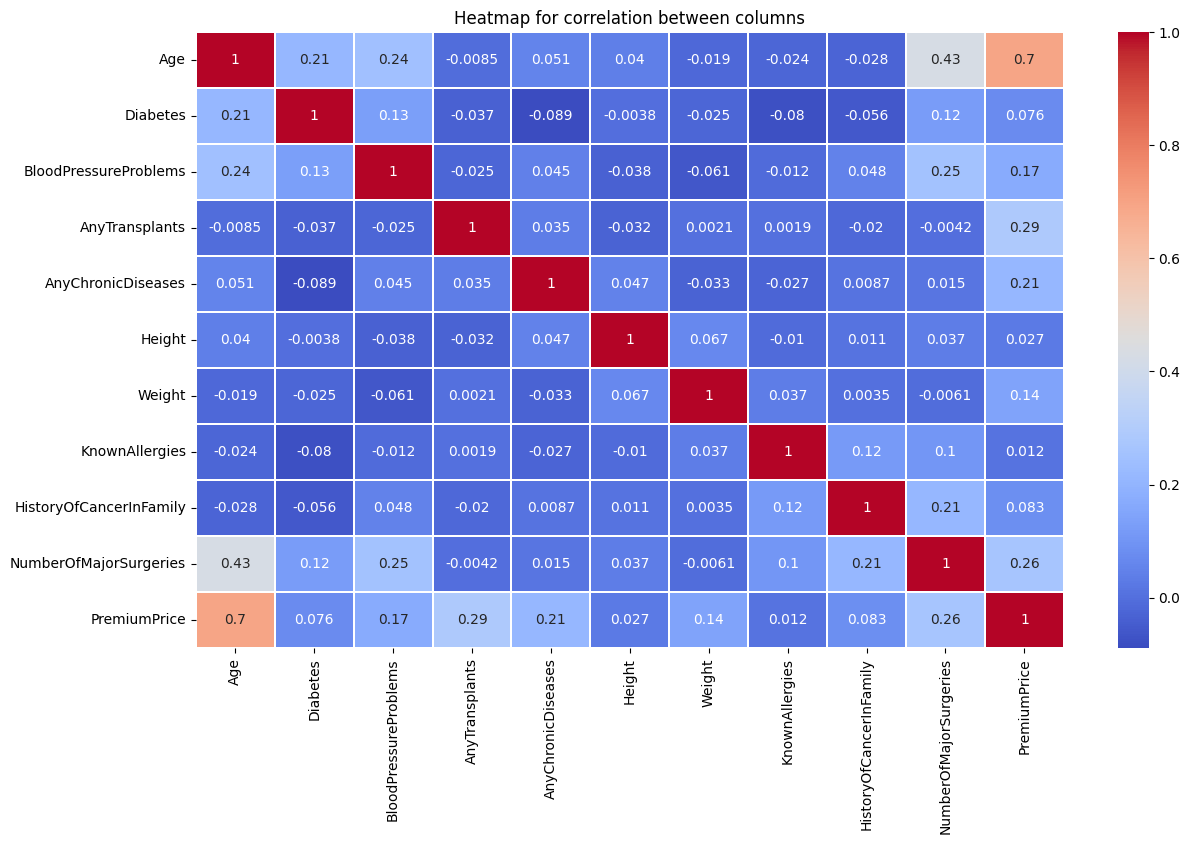

In [4]:
#heatmap
plt.figure(figsize=(14,8))
sns.heatmap(data.corr(), annot = True, cmap='coolwarm',linewidths=.1)
plt.title("Heatmap for correlation between columns")
plt.show()

In [5]:
data.Age.describe()

count    986.000000
mean      41.745436
std       13.963371
min       18.000000
25%       30.000000
50%       42.000000
75%       53.000000
max       66.000000
Name: Age, dtype: float64

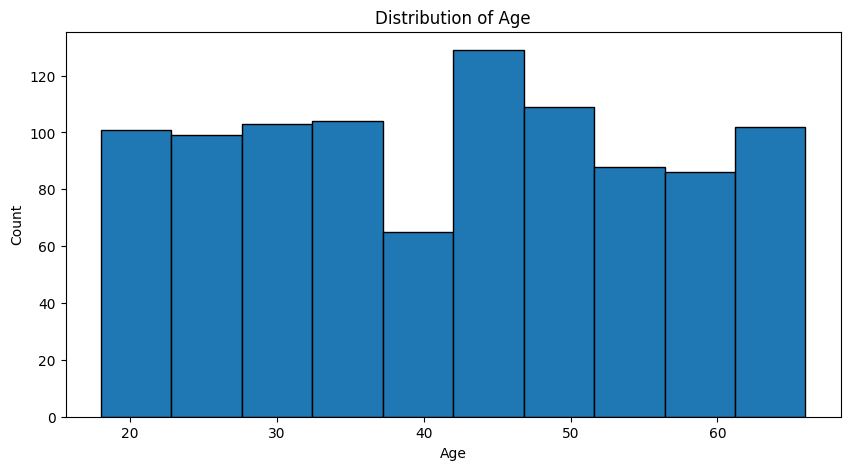

In [6]:
plt.figure(figsize=(10,5))
plt.hist(data.Age,edgecolor='k')
plt.xlabel("Age")
plt.ylabel("Count");
plt.title("Distribution of Age");

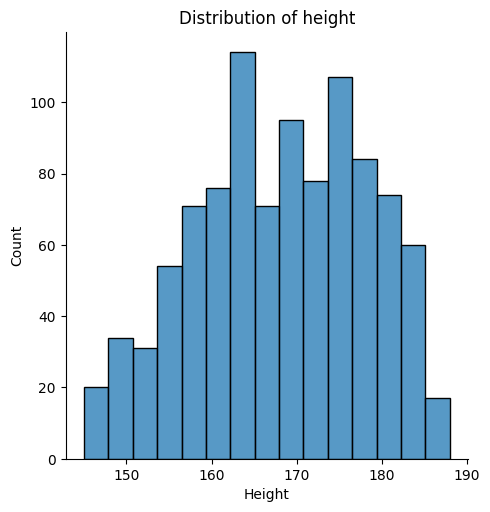

In [7]:
sns.displot(data.Height)
plt.title("Distribution of height");

In [8]:
#dependent and independent feature split
X = data.drop('PremiumPrice',axis=1)
y = data.PremiumPrice

In [9]:
data.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [10]:
#normalization
scalar =  StandardScaler()
X.Age = scalar.fit_transform(X[['Age']])
X.Height = scalar.fit_transform(X[['Height']])
X.Weight = scalar.fit_transform(X[['Weight']])

In [11]:
#train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=43)

In [12]:
#model
models = {
    LinearRegression():'Linear Regression',
    Lasso():'Lasso',
    Ridge():'Ridge',
    XGBRFRegressor():'XGBRFRegressor',
    RandomForestRegressor():'RandomForest'
}
for m in models.keys():
    m.fit(X_train,y_train)

In [13]:
for model,name in models.items():
     print(f"Accuracy Score for {name} is : ",model.score(X_test,y_test)*100,"%")

Accuracy Score for Linear Regression is :  68.94071160558988 %
Accuracy Score for Lasso is :  68.92612230263563 %
Accuracy Score for Ridge is :  68.86685393102887 %
Accuracy Score for XGBRFRegressor is :  79.69757780720673 %
Accuracy Score for RandomForest is :  79.01283857774179 %


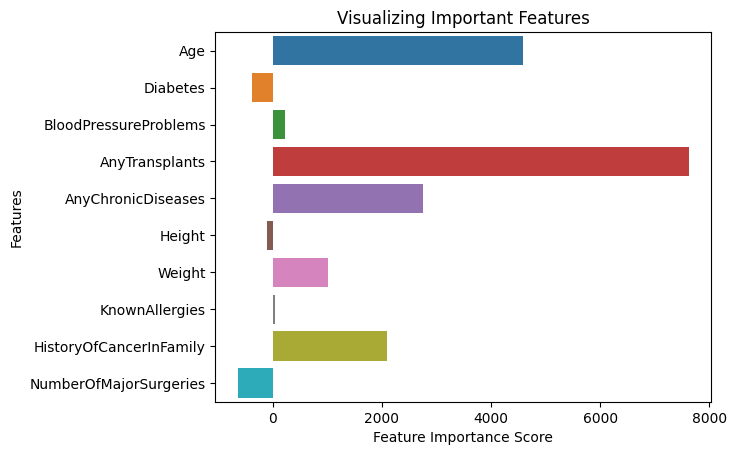

In [14]:
#finding important feature 
#Linear Regression
linear =LinearRegression()
linear.fit(X_train,y_train)
feature_imp2 = linear.coef_
ax = sns.barplot(x=feature_imp2, y=X.columns)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [15]:
print('coef value:', linear.coef_)
print('intercept value:', linear.intercept_)

coef value: [4588.88086238 -384.05022411  228.10351533 7623.85554389 2750.79538989
 -100.74343204 1007.33958957   42.06729339 2103.51259492 -634.07943149]
intercept value: 23681.92163079837


In [16]:
coef_table = pd.DataFrame(list(X_train.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",linear.coef_.transpose())

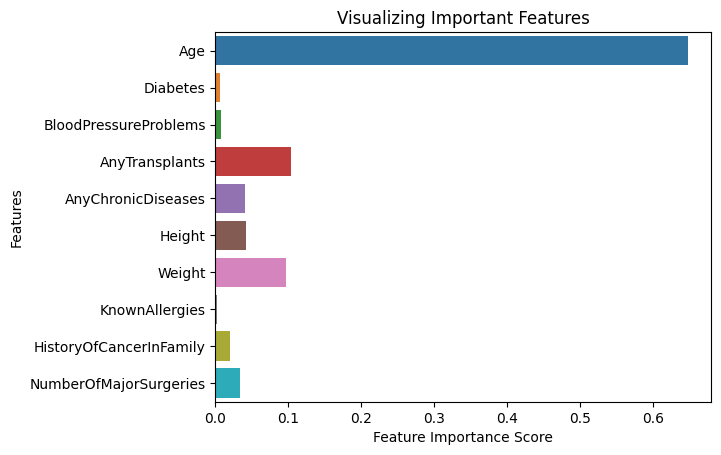

In [17]:
#random forest regressor
random_forest = RandomForestRegressor()
random_forest.fit(X_train,y_train)
feature_imp1 = random_forest.feature_importances_
sns.barplot(x=feature_imp1, y=X.columns)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

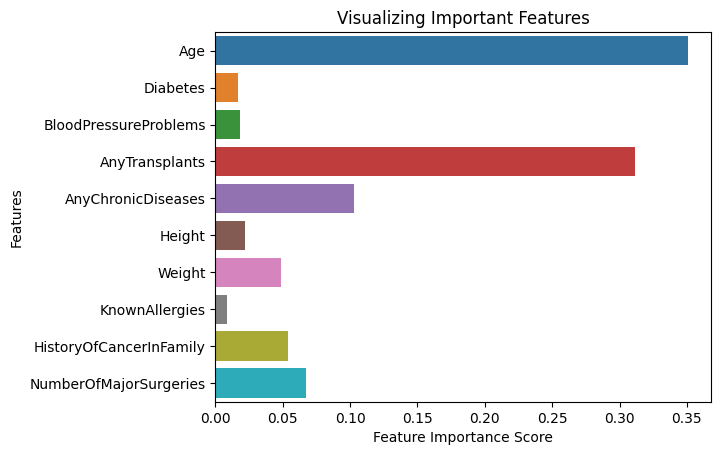

In [18]:
#xgboost
xgboost =XGBRFRegressor()
xgboost.fit(X_train,y_train)
feature_imp2 = xgboost.feature_importances_
sns.barplot(x=feature_imp2, y=X.columns)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show();

In [20]:
import pickle
file_name = "xgb_reg.pkl"

# save
pickle.dump(xgboost, open(file_name, "wb"))